 ##     Multiple Regression Analysis of House Sales Data in King County, Washington

**Author** : Nurgul Kurbanali kyzy <p>
**Blog Post**:

### Project Overview

We will use  multiple linear regression modeling for inference to study the relationship between the price and other variables present in the dataset between 20112-2105, with the hope of helping potential home buyers/seller understand the King County housing market. Thus great emphasis will be given to the coefficients of  features as opposed to the overall accuracy of the model.
 

### Problem Statement

The stakeholders of this project are a real estate agency that helps homeowners buy and/or sell homes. The business problem is to provide advice to homeowners on which aspects of the house features they should invest in, in order to increase the estimated values of their homes, and by what amount. 

### Data Understanding

The dataset includes 21 assessment parameters which describes every aspect of  homes in King County. These variables focus on the quality and quantity of the physical attributes of a property.

**Column Names and Descriptions for Data Set**
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
* `view` - Quality of view from house
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
* `grade` - Overall grade of the house. Related to the construction and design of the house.
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors


####  Data Load

In [1]:
# importing the packages that will be used for this project
import pandas as pd
# setting pandas display to avoid scientific notation in DataFrame
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline
import sklearn
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,...,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,...,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,NONE,...,6 Low Average,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,...,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,...,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
# 5 point statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.00,4580474287.77,2876735715.75,1000102.00,2123049175.00,3904930410.00,7308900490.00,9900000190.00
price,21597.00,540296.57,367368.14,78000.00,322000.00,450000.00,645000.00,7700000.00
bedrooms,21597.00,3.37,0.93,1.00,3.00,3.00,4.00,33.00
bathrooms,21597.00,2.12,0.77,0.50,1.75,2.25,2.50,8.00
sqft_living,21597.00,2080.32,918.11,370.00,1430.00,1910.00,2550.00,13540.00
sqft_lot,21597.00,15099.41,41412.64,520.00,5040.00,7618.00,10685.00,1651359.00
floors,21597.00,1.49,0.54,1.00,1.00,1.50,2.00,3.50
sqft_above,21597.00,1788.60,827.76,370.00,1190.00,1560.00,2210.00,9410.00
yr_built,21597.00,1971.00,29.38,1900.00,1951.00,1975.00,1997.00,2015.00
yr_renovated,17755.00,83.64,399.95,0.00,0.00,0.00,0.00,2015.00


### Data Cleaning

#### 1. Drop Irrelevant Columns

For the purposes of this project, we  will only be using a subset of all of the features present in the King County Housing dataset except : <p>
`id`  -  Unique identifier for a house <p>
`lat` -  Latitude coordinate<p>
`long`-  Latitude coordinate <p>
`zipcode` - ZIP Code used by the United States Postal Service


In [5]:
# Dropping the unnecessary columns
df.drop(columns=['id','lat','long','zipcode'], axis=1,inplace=True)

In [6]:
# Checking for the remainging columns 
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

#### 2. Handle Missing Values

In this step we will assess the presence of NaN values in our subset of data, and  handle any missing values.

In [7]:
# Checking for NaN values
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
# Finding the ratio of the NaN values
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending=False)

yr_renovated    17.79
waterfront      11.00
view             0.29
price            0.00
bedrooms         0.00
bathrooms        0.00
sqft_living      0.00
sqft_lot         0.00
floors           0.00
sqft_lot15       0.00
sqft_living15    0.00
condition        0.00
grade            0.00
sqft_above       0.00
sqft_basement    0.00
yr_built         0.00
date             0.00
dtype: float64

In [9]:
# Displaying the unique values in yr_renovated
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

`yr_renovated` - Year when house was renovated. It contains value 0.0that can be  houses have not been renovated yet. Since it contains almost %18 of missing values, instead of droping Nan values we will refill them with the value of 0.0 .


In [10]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)

`waterfront`- Whether the house is on a waterfront <p>
`view` - Quality of view from house    <p>
These columns are contain categorical values and have less NaN's we can drop the missing values in them


In [11]:
df.dropna(subset=['waterfront', 'view'], inplace=True)

In [12]:
# Displaying the unique values in sqft_basement
df.sqft_basement.unique()

array(['400.0', '0.0', '910.0', '1530.0', '?', '730.0', '300.0', '970.0',
       '760.0', '720.0', '700.0', '820.0', '780.0', '790.0', '330.0',
       '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0', '600.0',
       '550.0', '1000.0', '1600.0', '1700.0', '500.0', '1040.0', '880.0',
       '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0', '560.0',
       '840.0', '770.0', '570.0', '1490.0', '620.0', '1250.0', '1270.0',
       '120.0', '650.0', '180.0', '1130.0', '450.0', '1640.0', '1460.0',
       '1020.0', '1030.0', '750.0', '640.0', '1070.0', '490.0', '1310.0',
       '630.0', '2000.0', '390.0', '430.0', '210.0', '1950.0', '440.0',
       '220.0', '1160.0', '860.0', '580.0', '2060.0', '1820.0', '1180.0',
       '380.0', '200.0', '1150.0', '1200.0', '680.0', '1450.0', '1170.0',
       '1080.0', '960.0', '280.0', '870.0', '1100.0', '1400.0', '530.0',
       '660.0', '1220.0', '900.0', '420.0', '1580.0', '1380.0', '475.0',
       '690.0', '270.0', '350.0', '935.0', '710.0', '

In [13]:
# Replacing question marks with the 0.0 values
df['sqft_basement'].replace(
    to_replace=['?'],
    value='0.0',
    inplace=True
)

In [14]:
# Converting sqft_basement to a numeric type
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])
df.sqft_basement.dtype

dtype('float64')

In [15]:
# Checking for missing values
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### 3. Converting Categorical Features into Numbers

Encoding is a required pre-processing step when working with categorical data for machine learning algorithms<p>
In this step we will mostly use an *ordinal encoding* for categorical variables that have a natural rank ordering  and  *get_dummies()* function to convert categorical variable into dummy/indicator.

In [16]:
# Printing the information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19164 entries, 1 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           19164 non-null  object 
 1   price          19164 non-null  float64
 2   bedrooms       19164 non-null  int64  
 3   bathrooms      19164 non-null  float64
 4   sqft_living    19164 non-null  int64  
 5   sqft_lot       19164 non-null  int64  
 6   floors         19164 non-null  float64
 7   waterfront     19164 non-null  object 
 8   view           19164 non-null  object 
 9   condition      19164 non-null  object 
 10  grade          19164 non-null  object 
 11  sqft_above     19164 non-null  int64  
 12  sqft_basement  19164 non-null  float64
 13  yr_built       19164 non-null  int64  
 14  yr_renovated   19164 non-null  float64
 15  sqft_living15  19164 non-null  int64  
 16  sqft_lot15     19164 non-null  int64  
dtypes: float64(5), int64(7), object(5)
memory usage: 2

Anything that is already float64 or int64 will work with the model, but following features need to be converted. They all currently type `object` <p>
`date`      - Date house was sold <p>
`waterfront`- Whether the house is on a waterfront <p>
`condition` - How good the overall condition of the house is. Related to maintenance of house.<p>
`grade`     - Overall grade of the house. Related to the construction and design of the house.<p>
`view`      - Quality of view from house


In [17]:
# Tranforming 'date' to a datetime series and return just years that house was sold.
df['date'] = pd.to_datetime(df['date']).dt.date
df['date'] = pd.to_datetime(df['date']).dt.year

In [18]:
# Displaying all the unique values within the selected columns
print (df.waterfront.unique())
print()
print (df.condition.unique())
print()
print(df.view.unique())
print()
print (df.grade.unique())

['NO' 'YES']

['Average' 'Very Good' 'Good' 'Poor' 'Fair']

['NONE' 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']

['7 Average' '6 Low Average' '8 Good' '11 Excellent' '9 Better' '5 Fair'
 '10 Very Good' '12 Luxury' '4 Low' '3 Poor' '13 Mansion']


It looks like just `waterfront` has only 2 categories and can be converted into binary in place whereas other columns have more than 2 categories, and they all are ordinal categories.

In [19]:
# Converting waterfront into dummy/indicator variables
pd.get_dummies(df, prefix='wtf', columns=['waterfront'], drop_first=True)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,wtf_YES
1,2014,538000.00,3,2.25,2570,7242,2.00,NONE,Average,7 Average,2170,400.00,1951,1991.00,1690,7639,0
2,2015,180000.00,2,1.00,770,10000,1.00,NONE,Average,6 Low Average,770,0.00,1933,0.00,2720,8062,0
3,2014,604000.00,4,3.00,1960,5000,1.00,NONE,Very Good,7 Average,1050,910.00,1965,0.00,1360,5000,0
4,2015,510000.00,3,2.00,1680,8080,1.00,NONE,Average,8 Good,1680,0.00,1987,0.00,1800,7503,0
5,2014,1230000.00,4,4.50,5420,101930,1.00,NONE,Average,11 Excellent,3890,1530.00,2001,0.00,4760,101930,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2015,475000.00,3,2.50,1310,1294,2.00,NONE,Average,8 Good,1180,130.00,2008,0.00,1330,1265,0
21592,2014,360000.00,3,2.50,1530,1131,3.00,NONE,Average,8 Good,1530,0.00,2009,0.00,1530,1509,0
21593,2015,400000.00,4,2.50,2310,5813,2.00,NONE,Average,8 Good,2310,0.00,2014,0.00,1830,7200,0
21594,2014,402101.00,2,0.75,1020,1350,2.00,NONE,Average,7 Average,1020,0.00,2009,0.00,1020,2007,0


In [20]:
# Dropping original waterfront column
df.drop(columns=['waterfront'], axis=1, inplace=True)

In [21]:
# Ordinal encoding by assigning an integer value for each unique category 
cond_dic = {"Poor" : 1, "Fair" : 2, "Average": 3, "Good" : 4, "Very Good": 5}
view_dic = {"NONE":1,'FAIR':2, "AVERAGE":3,"GOOD":4 , "EXCELLENT":5}
df["condition"] = df['condition'].map(cond_dic)
df["view"] = df['view'].map(view_dic)
df.head().T

,1,2,3,4,5
date,2014,2015,2014,2015,2014
price,538000.00,180000.00,604000.00,510000.00,1230000.00
bedrooms,3,2,4,3,4
bathrooms,2.25,1.00,3.00,2.00,4.50
sqft_living,2570,770,1960,1680,5420
sqft_lot,7242,10000,5000,8080,101930
floors,2.00,1.00,1.00,1.00,1.00
view,1,1,1,1,1
condition,3,3,5,3,3
grade,7 Average,6 Low Average,7 Average,8 Good,11 Excellent


In [22]:
# Extracting only numerical values of the column
df['grade'] = df['grade'].str.split(" ", n = 1, expand = True)


In [23]:
# Changing dtype into float
df['grade'] = df.grade.astype('float')

In [24]:
# Checking  for final DataFrame dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19164 entries, 1 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           19164 non-null  int64  
 1   price          19164 non-null  float64
 2   bedrooms       19164 non-null  int64  
 3   bathrooms      19164 non-null  float64
 4   sqft_living    19164 non-null  int64  
 5   sqft_lot       19164 non-null  int64  
 6   floors         19164 non-null  float64
 7   view           19164 non-null  int64  
 8   condition      19164 non-null  int64  
 9   grade          19164 non-null  float64
 10  sqft_above     19164 non-null  int64  
 11  sqft_basement  19164 non-null  float64
 12  yr_built       19164 non-null  int64  
 13  yr_renovated   19164 non-null  float64
 14  sqft_living15  19164 non-null  int64  
 15  sqft_lot15     19164 non-null  int64  
dtypes: float64(6), int64(10)
memory usage: 2.5 MB


#### 4. Data Exploration (EDA)

This section aims to to identify any potential issues (outliers ,unexpected entries etc) with the features and decide on how to handle those issues.

In [25]:
# 5 Point Statistical Summary
df.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,19164.00,19164.00,19164.00,19164.00,19164.00,19164.00,19164.00,19164.00,19164.00,19164.00,19164.00,19164.00,19164.00,19164.00,19164.00,19164.00
mean,2014.32,541448.96,3.37,2.12,2082.04,15061.74,1.50,1.23,3.41,7.66,1791.43,284.38,1971.04,67.81,1987.22,12797.65
std,0.47,370900.94,0.93,0.77,921.92,40772.15,0.54,0.76,0.65,1.18,831.78,439.44,29.39,361.61,684.79,27552.63
min,2014.00,78000.00,1.00,0.50,370.00,520.00,1.00,1.00,1.00,3.00,370.00,0.00,1900.00,0.00,399.00,651.00
25%,2014.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,1.00,3.00,7.00,1200.00,0.00,1951.00,0.00,1490.00,5100.00
50%,2014.00,450000.00,3.00,2.25,1920.00,7620.00,1.50,1.00,3.00,7.00,1560.00,0.00,1975.00,0.00,1840.00,7620.00
75%,2015.00,643962.50,4.00,2.50,2550.00,10720.00,2.00,1.00,4.00,8.00,2217.75,540.00,1997.00,0.00,2360.00,10093.25
max,2015.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,5.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,6210.00,871200.00


In [26]:
df.yr_renovated.unique()

array([1991.,    0., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1990., 1988., 1977.,
       1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004., 1986.,
       2007., 1987., 2006., 1985., 2001., 1980., 1971., 1945., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 2008., 2012., 1968.,
       1963., 1951., 1962., 1953., 1993., 1955., 1996., 1982., 1956.,
       1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959., 1960.,
       1965., 1967., 1934., 1972., 1944., 1958., 1974.])

We can filter  `yr_renovated` values by dividing them into binary categories. 


In [27]:
# Dividing values in yr_renovation to boolean  (renovated: True-1, not renovated:0)
df['yr_renovated']= df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

In [28]:
df['yr_renovated'].value_counts()

0    18513
1      651
Name: yr_renovated, dtype: int64

Based on the given columns `year_sold` `yr_built` we can create new column that show the house_age

In [29]:
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
1,2014,538000.00,3,2.25,2570,7242,2.00,1,3,7.00,2170,400.00,1951,1,1690,7639
2,2015,180000.00,2,1.00,770,10000,1.00,1,3,6.00,770,0.00,1933,0,2720,8062
3,2014,604000.00,4,3.00,1960,5000,1.00,1,5,7.00,1050,910.00,1965,0,1360,5000


In [30]:
# Looking for unique values
df.date.unique()

array([2014, 2015], dtype=int64)

In [31]:
# Looking for unique values
df.yr_built.unique()

array([1951, 1933, 1965, 1987, 2001, 1995, 1960, 2003, 1942, 1927, 1977,
       1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985, 1941, 1915,
       1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 1984, 2014, 1922,
       1959, 1966, 1953, 1955, 1950, 2008, 1991, 1954, 1925, 1973, 1972,
       1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006, 1988, 1962, 1939,
       1946, 1967, 1975, 1980, 1910, 1983, 1905, 1971, 2010, 1945, 1990,
       1914, 1978, 1926, 1989, 1923, 2007, 2000, 1976, 1949, 1999, 1901,
       1993, 1920, 1997, 2004, 1940, 1918, 1928, 1974, 1911, 1936, 1937,
       1982, 1908, 1931, 1963, 1957, 1998, 1913, 1943, 2013, 1924, 1958,
       2011, 1932, 1902, 2009, 1903, 1944, 1970, 2015, 2012, 1934, 1912,
       1938, 1919, 1917, 1906, 1907, 1935], dtype=int64)

In [32]:
# Calculating house age based on the house sold/build years
df['house_age'] = df['date'] - df['yr_built']

# Dropping the original columns within dataset
df.drop(columns=['date', 'yr_built'], axis=1, inplace=True) 

In [33]:
# Getting the first 3 row
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,house_age
1,538000.00,3,2.25,2570,7242,2.00,1,3,7.00,2170,400.00,1,1690,7639,63
2,180000.00,2,1.00,770,10000,1.00,1,3,6.00,770,0.00,0,2720,8062,82
3,604000.00,4,3.00,1960,5000,1.00,1,5,7.00,1050,910.00,0,1360,5000,49


##### 4.1 Outliers

In [34]:
# 5 point statistical summary
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,house_age
count,19164.00,19164.00,19164.00,19164.00,19164.00,19164.00,19164.00,19164.00,19164.00,19164.00,19164.00,19164.00,19164.00,19164.00,19164.00
mean,541448.96,3.37,2.12,2082.04,15061.74,1.50,1.23,3.41,7.66,1791.43,284.38,0.03,1987.22,12797.65,43.28
std,370900.94,0.93,0.77,921.92,40772.15,0.54,0.76,0.65,1.18,831.78,439.44,0.18,684.79,27552.63,29.39
min,78000.00,1.00,0.50,370.00,520.00,1.00,1.00,1.00,3.00,370.00,0.00,0.00,399.00,651.00,-1.00
25%,322000.00,3.00,1.75,1430.00,5040.00,1.00,1.00,3.00,7.00,1200.00,0.00,0.00,1490.00,5100.00,18.00
50%,450000.00,3.00,2.25,1920.00,7620.00,1.50,1.00,3.00,7.00,1560.00,0.00,0.00,1840.00,7620.00,39.00
75%,643962.50,4.00,2.50,2550.00,10720.00,2.00,1.00,4.00,8.00,2217.75,540.00,0.00,2360.00,10093.25,63.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,5.00,5.00,13.00,9410.00,4820.00,1.00,6210.00,871200.00,115.00


In [35]:
# Getting the current shape of an array
df.shape

(19164, 15)

We will visualize our data with a box plot, so we can see the data distribution at a glance. This type of chart highlights minimum and maximum values (the range), the median, and the interquartile range for our data.

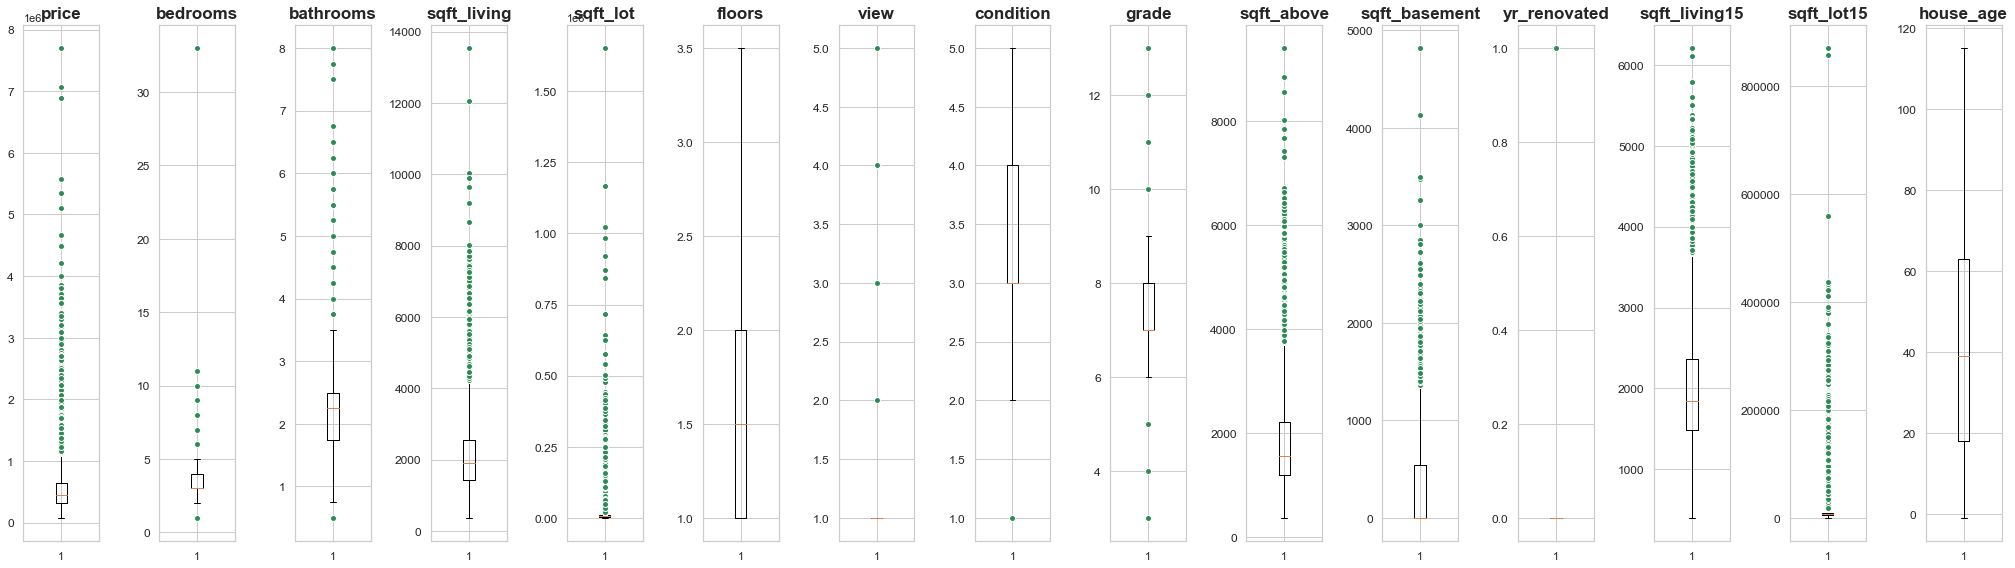

In [36]:
# Defining our outliers as a green underscore circle
green_circle = dict(markerfacecolor='seagreen', marker='o', markeredgecolor='white')

# Setting the figsize to 28 by 8.
fig, axs = plt.subplots(1, len(df.columns), figsize=(28,8))

# Creating a small for loop which will loop over each of our plot axes
for i, ax in enumerate(axs.flat):
    
    # specifying our outlier properties and pass in green_circle.
    ax.boxplot(df.iloc[:,i], flierprops=green_circle)
    df.iloc[:,i]
    ax.set_title(df.columns[i], fontsize=17, fontweight='bold')
    ax.tick_params(axis='y', labelsize=12)
    
# spacing out the plots in a nice way
plt.tight_layout()

We can remove some extrem outliers by keeping only those data points that fall under the 3 standard deviations

In [37]:
#  Getting a NumPy array containing the z-score of each value
z_scores = stats.zscore(df[['price','bedrooms', 'bathrooms','sqft_lot',
                            'sqft_above','sqft_basement','sqft_living',
                            'sqft_living15','sqft_lot15']])

# Creating a boolean array and filtering the original DataFrame with this result
final_df = df[(np.abs(z_scores) < 3).all(axis=1)] 


In [38]:
# Final DataFrame 5 point statistics
final_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,house_age
count,17968.00,17968.00,17968.00,17968.00,17968.00,17968.00,17968.00,17968.00,17968.00,17968.00,17968.00,17968.00,17968.00,17968.00,17968.00
mean,494193.35,3.32,2.05,1967.28,10116.19,1.48,1.18,3.41,7.55,1701.98,259.50,0.03,1920.27,9310.86,43.89
std,246875.06,0.85,0.69,748.73,11893.23,0.54,0.66,0.65,1.05,708.54,392.97,0.18,604.24,9340.62,29.43
min,78000.00,1.00,0.50,370.00,520.00,1.00,1.00,1.00,3.00,370.00,0.00,0.00,460.00,651.00,-1.00
25%,315000.00,3.00,1.50,1400.00,5000.00,1.00,1.00,3.00,7.00,1170.00,0.00,0.00,1470.00,5000.00,18.00
50%,440000.00,3.00,2.00,1860.00,7415.00,1.00,1.00,3.00,7.00,1520.00,0.00,0.00,1800.00,7488.50,41.00
75%,612000.00,4.00,2.50,2440.00,10018.75,2.00,1.00,4.00,8.00,2110.00,500.00,0.00,2280.00,9694.00,63.00
max,1650000.00,6.00,4.25,4750.00,137214.00,3.50,5.00,5.00,12.00,4280.00,1600.00,1.00,4040.00,94960.00,115.00


In [39]:
# Getting the last shape of an array
final_df.shape

(17968, 15)

We can also take a glance at the overall distribution of data variables.

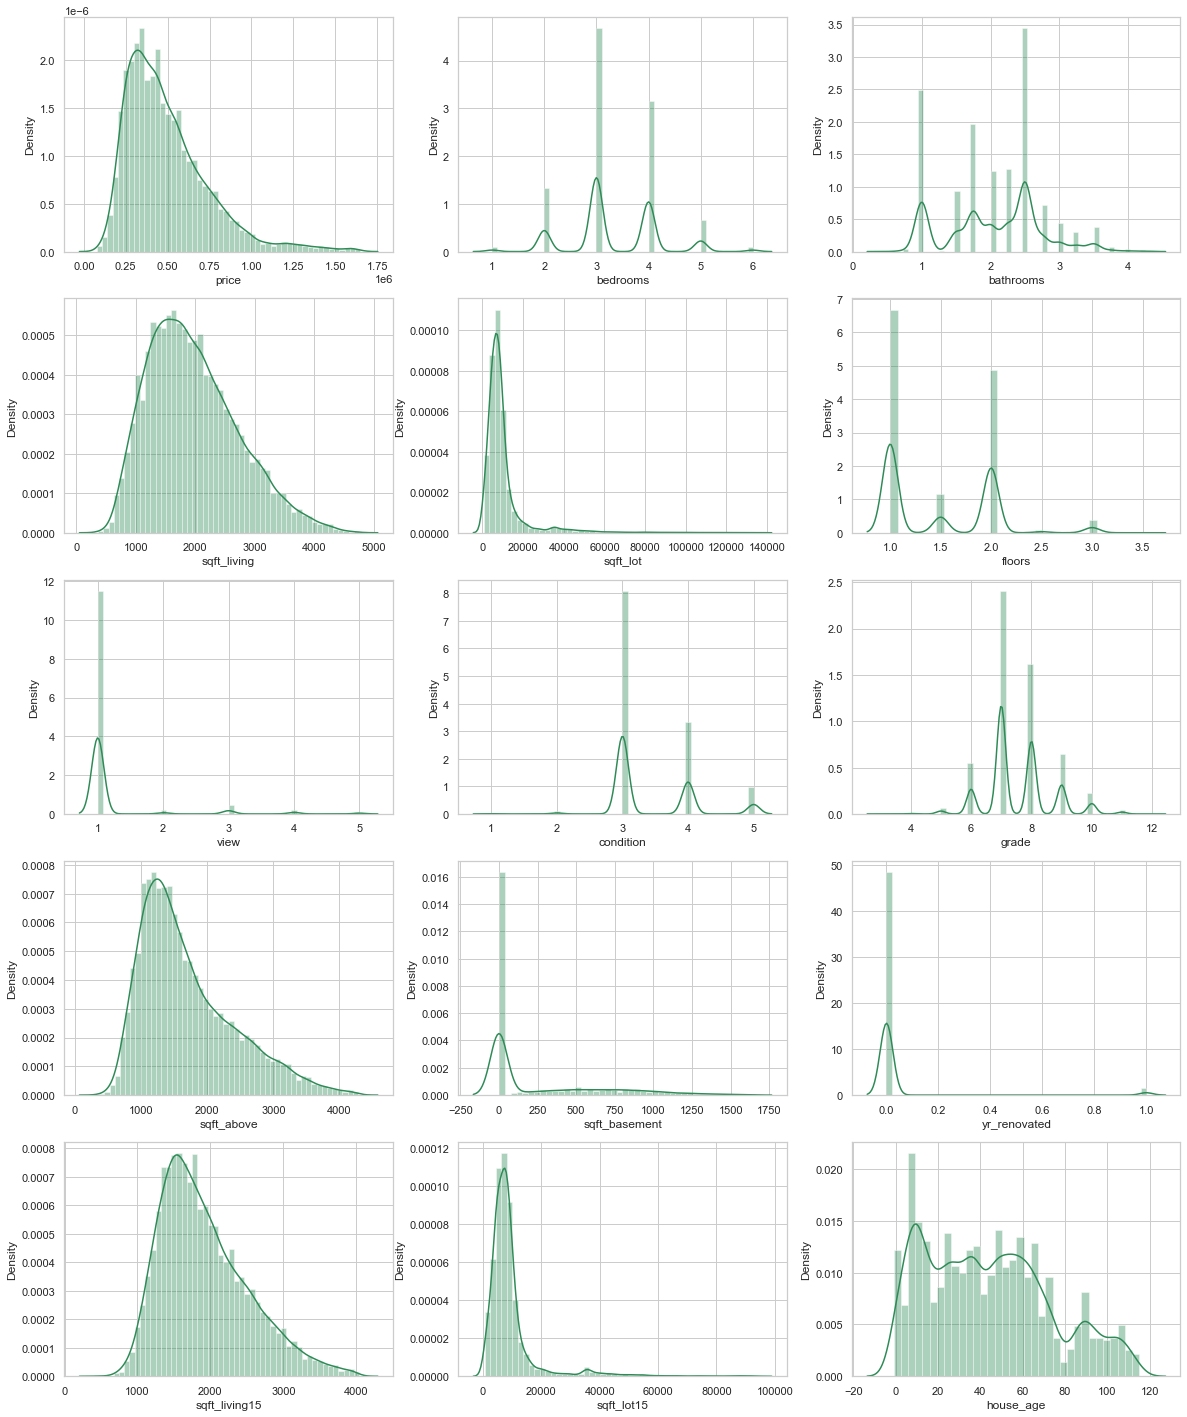

In [40]:
# Setting col/row size
x = 5
y = 3
# Setting the figsize 
fig, ax = plt.subplots(x, y, figsize=(20, 25))
col = 0
column = final_df.columns
for i in range(x):
    for j in range(y):
        sns.distplot(final_df[column[col]], color='seagreen', ax=ax[i][j])
        ax[i][j]
        col+=1

From the above graph, we can see that most  variables are highly skewed to the right direction (has a long right tail in the positive direction on the number line). <p> Most frequent bedrooms are 3-4. Most houses have not been renovated yet. Preferable house floors are among 1-2. Majority house conditions are around average with the frequent grade of *average and good*.

##### 4.2 Variables Correlations 

After cleaning we will buld the correlation matrix to show the degree of the linear relationship between variables in a dataset. It indicates the correlation using the correlation coefficients. Correlation coefficients ranges from **-1 to +1**.<p>
Each square shows the correlation between the variables on each axis.  Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. <p> The larger the number and darker the color the higher the correlation between the two variables.

Text(0.5, 1.0, 'King County Housing Correlation Heatmap')

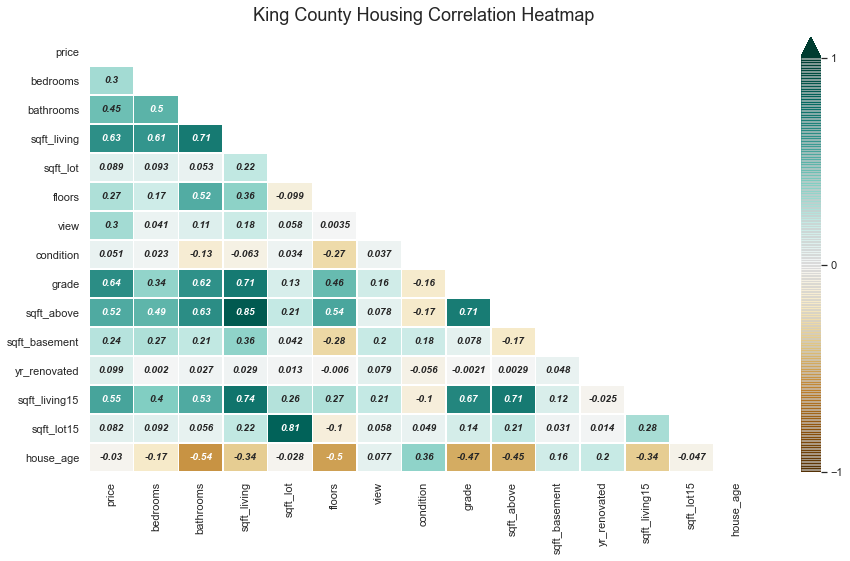

In [41]:
# Setup figure size and style
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(final_df.corr(), dtype=np.bool))
df_heatmap = sns.heatmap(final_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG', linewidth=0.5,
                        cbar_kws={'orientation':'vertical', 'shrink':1,'extend':'max', 'ticks':[-1, 0, 1], 'drawedges':True},
                        annot_kws={'fontsize':10, 'fontstyle':'italic','fontweight':'bold', 'verticalalignment':'center'})
df_heatmap.set_title('King County Housing Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

# Save output image as .png
#plt.savefig('corr_heatmap.png', dpi=300, bbox_inches='tight')

From the correlation heatmap plotted above we can visually inspect highly correlated variables as well as our dependent variable `price`. Based on the plot above,the top nine correlated features visually proved their strong correlation with the price in the graph below. To stay more focused we will extract the target variable below.

In [42]:
final_df.describe().bedrooms

count   17968.00
mean        3.32
std         0.85
min         1.00
25%         3.00
50%         3.00
75%         4.00
max         6.00
Name: bedrooms, dtype: float64

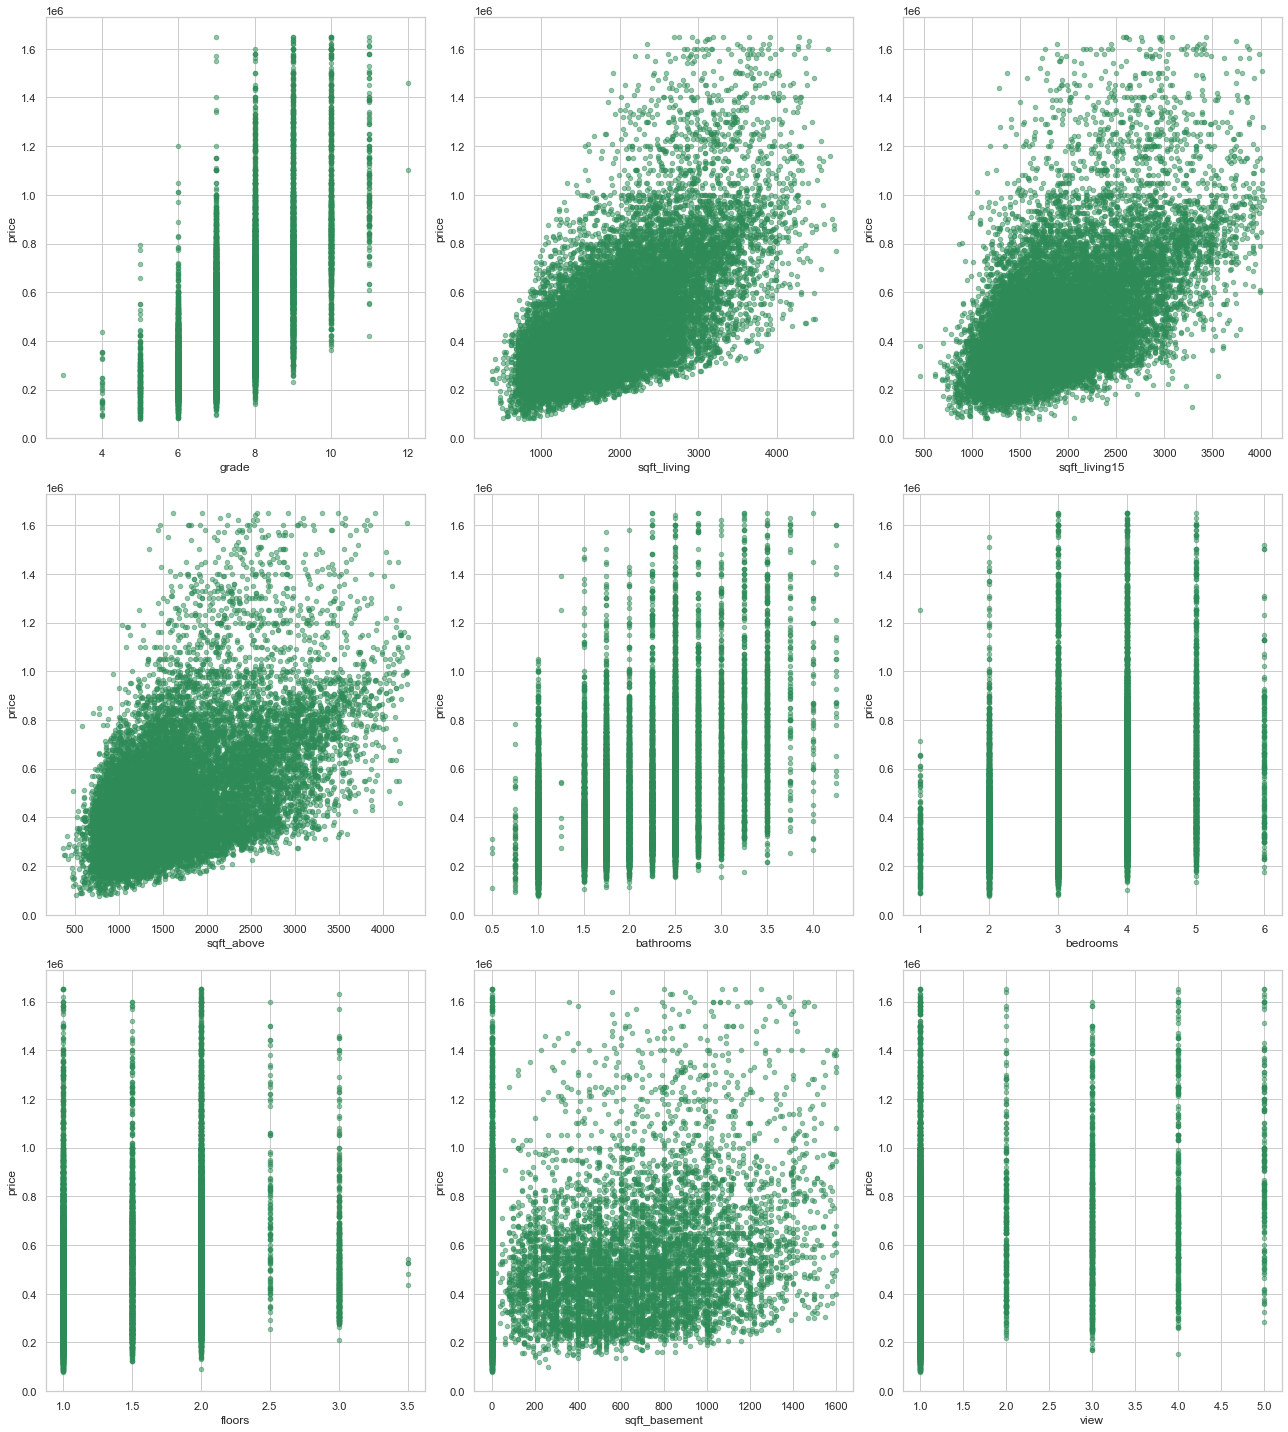

In [43]:
# setup figure
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 20))

# iterate and plot subplots
top_feat = final_df[['grade', 'sqft_living', 'sqft_living15', 'sqft_above','bathrooms','bedrooms',
                     'floors','sqft_basement','view']].copy()
for xcol, ax in zip(top_feat.columns, [x for v in axes for x in v]):
    final_df.plot.scatter(x=xcol, y='price', ax=ax, alpha=0.5, color='seagreen')
fig.tight_layout()
plt.show()

### Model Building

####   Baseline  Model


We will start to buling our first simple  called *baseline* model along with the feature of `sqft_living`

* X = *features, independent variables, predictor*
* y =  *target, dependent variable, fitted value*

In [44]:
# Creating function for Linear Regression

def building_lr_model(df):

    # Creating features and target variables
    X = df.drop(columns=['price'], axis=1)
    y = df.price
    
    # Splitting data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
    #print(len(X_train), len(X_test), len(y_train), len(y_test))
    
    # Fitting the model
    lr = LinearRegression()
    model = lr.fit(X_train, y_train)
    model
    
    # Using the model to predict y values for the test and train data
    y_hat_train = lr.predict(X_train)
    y_hat_test = lr.predict(X_test)
    
    #Calculate training and test residuals
    train_residuals = y_hat_train - y_train
    test_residuals = y_hat_test - y_test
    
    '''
    A good way to compare overall performance is to compare
    the mean squarred error for the predicted values on the training and test sets.
    '''
    # Calculate the Mean Squared Error (MSE)
    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)
    print('Train Mean Squarred Error:', train_mse)
    print('Test Mean Squarred Error:', test_mse)
    
    
    # Model Summary
    X_train = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_train).fit()
    print(model.summary())
    return model

In [45]:
base_df = final_df[['sqft_living','price']]
base_model = building_lr_model(base_df)
base_model

Train Mean Squarred Error: 36552618911.281075
Test Mean Squarred Error: 38978563962.173195
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     9230.
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        14:36:27   Log-Likelihood:            -1.9520e+05
No. Observations:               14374   AIC:                         3.904e+05
Df Residuals:                   14372   BIC:                         3.904e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

**R-squared** value is 0.391 i.e. 39% of the variance in the target variable can be explained by the features. In general this seems like a fairly not strong model enough. An explanatory variable in the model is statistically significant at the 95% level (i.e. **p-value** < 5%) which means we can reject the null hypothesis. 


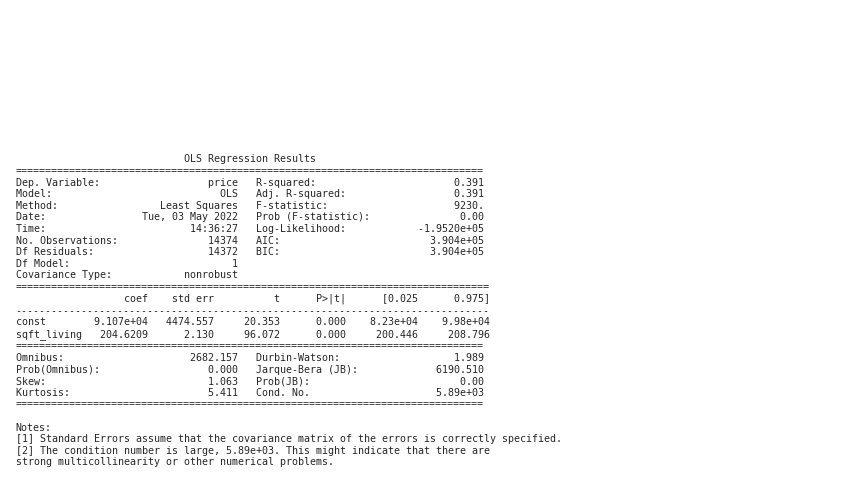

In [46]:
# Saving statsmodels result as an image file

plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(base_model.summary()), {'fontsize': 10}, fontproperties = 'monospace') 
plt.axis('off')
plt.tight_layout()
plt.savefig('BaseModel.png')

#### Regression Assumptions Base Model
- Linearity : the line of best fit through the data points is a straight line, rather than a curve


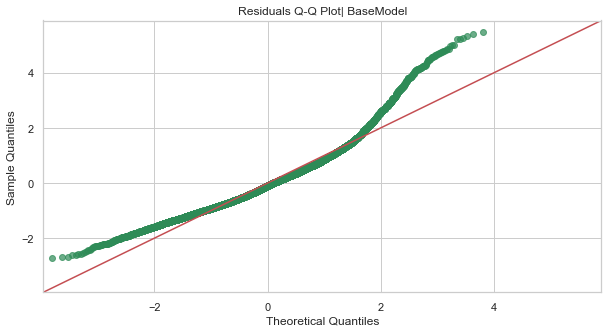

In [47]:
# Checking  for the normality of the residuals
plt.rc("figure", figsize=(10,5))
fig = sm.graphics.qqplot(base_model.resid, dist=stats.norm, line='45', fit=True, 
                         markerfacecolor='seagreen', markeredgecolor='seagreen',alpha=0.7 )
plt.title("Residuals Q-Q Plot| BaseModel")
plt.show()

#Saving plot as a png
#plt.savefig("Base Model_Resid_qqplot.png")

- Normality : the data follows a normal distribution


<AxesSubplot:ylabel='Density'>

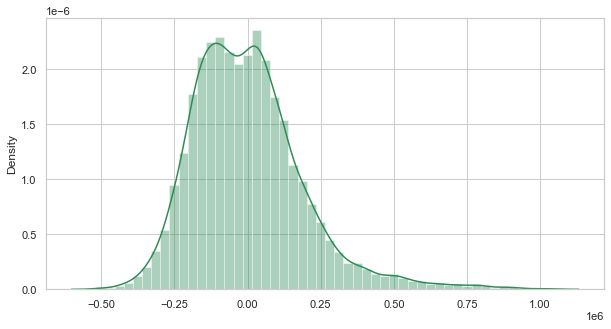

In [48]:
# Setting the figsize 
plt.figure(figsize=(10, 5))
sns.distplot(base_model.resid, color='seagreen')

# Saving plot as a png
#plt.savefig("Base Model_Distrib.png")

- Homoscedasticity : the size of the error in the prediction doesn’t change significantly across the values of the independent variable.

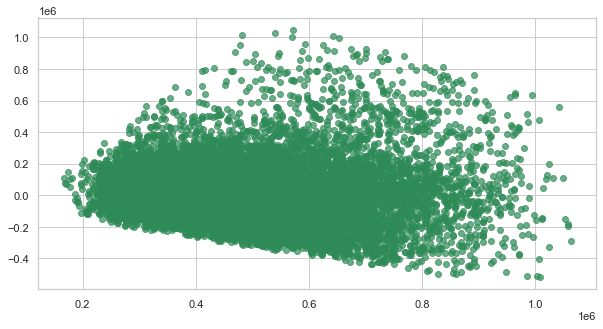

In [49]:
# Setting the figsize 
plt.figure(figsize=(10, 5))
plt.scatter(x=base_model.predict(), y=base_model.resid, color='seagreen', alpha=0.7)
#plt.title('Base Model', fontsize=16, y=.99)
#Saving plot as a png
#plt.savefig("BaseModel_Resid_regplot.png")

A slight curved Q-Q plot line suggests residuals may have a non-normal distribution. Base model slightly violates the homoscedasticity and normality assumptions for linear regression. We can further apply Log-transformation to meet this assumptions in our upcoming models

#### Model #1

Let's construct the second model by log transorming target variable and  including all the remaining features which have correlations above 0.20 with the target variable.


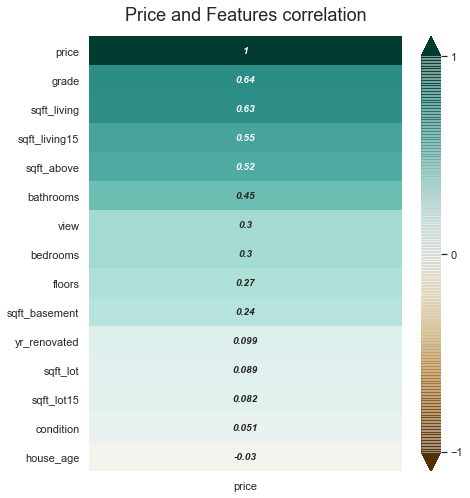

In [50]:
# Setting the figsize 
plt.figure(figsize=(7, 8))
heatmap = sns.heatmap(final_df.corr()[['price']].sort_values(by='price', ascending=False), 
                      vmin=-1, vmax=1, annot=True, cmap='BrBG',cbar_kws={'orientation':'vertical',
                                                                         'shrink':1,'extend':'both',
                                                                         'ticks':[-1, 0, 1], 'drawedges':True},
                      annot_kws={'fontsize':10, 'fontstyle':'italic','fontweight':'bold', 'verticalalignment':'center'})

heatmap.set_title('Price and Features correlation', fontdict={'fontsize':18}, pad=16);
#plt.savefig('target_feat_corr.png', dpi=300, bbox_inches='tight')

In [51]:
# Log transform of target variable
final_df['price'] = np.log(final_df['price'])

In [ ]:
# Building 1-Model
model1_df = final_df[['price', 'grade','sqft_living','sqft_living15','sqft_above',
                      'bathrooms','bedrooms','view','floors','sqft_basement']]
model1 = building_lr_model(model1_df)
model1

**R-squared**: 50% of the variance in the target variable can be explained by the features <p>
**p-value**: We can reject the null hyphothesis and conclude that a significant difference exists for 8 features in our model except `sqft_basement`. It hase p_vale `0.761` meaning that deviation from the null hypothesis is not statistically significant, and the null hypothesis is not rejected. It may be due to the Multicollinearity issues. We will check it in our second model.

#### Regression Assumptions Model #1
- Linearity


In [ ]:
# Checking  for the normality of the residuals
plt.rc("figure", figsize=(10,5))
fig = sm.graphics.qqplot(model1.resid, dist=stats.norm, line='45', fit=True, 
                         markerfacecolor='seagreen', markeredgecolor='seagreen',alpha=0.7 )
plt.title("Residuals Q-Q Plot| Model1")
plt.show()

#Saving plot as a png
plt.savefig("Model1_Resid_qqplot.png")

- Normality

In [ ]:
plt.figure(figsize=(10, 5))
sns.distplot(model1.resid, color='seagreen')
#Saving plot as a png
plt.savefig("Model1_Distrib.png")

- Homoscedasticity

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(x=model1.predict(), y=model1.resid, color='seagreen', alpha=0.5)
#plt.title('Model1', fontsize=16, y=.99)
#Saving plot as a png
plt.savefig("Model1_Resid_regplot.png")

In [ ]:
# Saving statsmodels result as an image file
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model1.summary()), {'fontsize': 10}, fontproperties = 'monospace') 
plt.axis('off')
plt.tight_layout()
plt.savefig('Model1.png')

#### Model #2

For second model we will check for multicollinearity of the features and make required adjustifications . We will perform it by  looking their correlation coefficients  with magnitudes of **.70** or higher

In [ ]:
# Selecting  features
feat_col = model1_df.drop(columns=['price'])

top_feat= feat_col.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
top_feat['features'] = list(zip(top_feat.level_0, top_feat.level_1))
top_feat.set_index(['features'], inplace = True)
top_feat.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column 
top_feat.columns = ['correlation']
top_feat.drop_duplicates(inplace=True)

top_feat[(top_feat.correlation>.70) & (top_feat.correlation<1)].reset_index()

The `sqft_living` and `sqft_above` demonstrating higher multicollinearity within our selected top features. We will construct our models by eliminating them in seperate models further. 
Let's  try to drop `sqft_living` first in the model below

In [ ]:
model2_df = model1_df.drop(columns=['sqft_living'])
model2 = building_lr_model(model2_df)
model2

**R-squared**:  The R2 = 0.499, meaning that “49.9%” of the variance in the measure of the response (SalePrice) can be predicted by the selected predictor variables in the model<p>
**P-value**: All of the p-values of the features round to *0.0* means they are statistically significant at the level of 95%.



#### Regression Assumptions Model #2
- Linearity

In [ ]:
# Checking  for the normality of the residuals
plt.rc("figure", figsize=(10,5))
fig = sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True, 
                         markerfacecolor='seagreen', markeredgecolor='seagreen',alpha=0.7 )
plt.title("Residuals Q-Q Plot| Model2")
plt.show()

#Saving plot as a png
plt.savefig("Model2_Resid_qqplot.png")

-  Normality

In [ ]:
plt.figure(figsize=(10, 5))
sns.distplot(model2.resid, color='seagreen')

#Saving plot as a png
plt.savefig("Model2_Distrib.png")

- Homoscedasticity

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(x=model2.predict(), y=model2.resid, color='seagreen', alpha=0.5)
#plt.title('Model1', fontsize=16, y=.99)
#Saving plot as a png
plt.savefig("Model1_Resid_regplot.png")

In [ ]:
# Saving statsmodels result as an image file
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model2.summary()), {'fontsize': 10}, fontproperties = 'monospace') 
plt.axis('off')
plt.tight_layout()
plt.savefig('Model2.png')

####  Model #3

For the third model we will be eliminating  `sqft_above` cause of multicollinerity and `sqft_living15` due to it's low coefficience.

In [ ]:
model3_df = model1_df.drop(columns=['sqft_above', 'sqft_living15'])
model3 = building_lr_model(model3_df)
model3

**R-squared**: In terms of R2-value we got decrease 0.002 than the second model <p>
**P-value** : We can still reject the null hyphothesis and conclude that a significant difference does exist at the 95% level.

#### Regression Assumptions Model #3
- Linearity

In [ ]:
# Checking  for the normality of the residuals
plt.rc("figure", figsize=(10,5))
fig = sm.graphics.qqplot(model3.resid, dist=stats.norm, line='45', fit=True, 
                         markerfacecolor='seagreen', markeredgecolor='seagreen',alpha=0.7 )
plt.title("Residuals Q-Q Plot| Model3")
plt.show()
#Saving plot as a png
plt.savefig("Model3_Resid_qqplot.png")

- Normality

In [ ]:
plt.figure(figsize=(10, 5))
sns.distplot(model3.resid, color='seagreen')
#Saving plot as a png
plt.savefig("Model3_Distrib.png")

- Homoscedasticity

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(x=model3.predict(), y=model3.resid, color='seagreen', alpha=0.5)
#plt.title('Model3', fontsize=16, y=.99)
#Saving plot as a png
plt.savefig("Model3_Resid_regplot.png")

In [ ]:
# Saving statsmodels result as an image file
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model3.summary()), {'fontsize': 10}, fontproperties = 'monospace') 
plt.axis('off')
plt.tight_layout()
plt.savefig('Model3.png')


To see which predictor variables are significant, we can examine the coefficients table, which shows the estimate of regression coefficients and the associated t-statistic, and p-values:

When the p-value is less than `0.05`, this tells us that the predictor is statistically significant. In our final model all predictor variables have p-values less than 0.05, meaning all these predictors are significant. So, we can consider this model as our final predictive model.

### Conclusion

Thus we have created a linear regression model determining best predictors of a house's price in King County, WA between 2014-2015. <p> 
The methodology included cleaning the datasets from outliers, combining the training and testing data , exploring the data and producing the summary statistics, checking for the completeness of data and missing values, conducting Exploratory Data Analysis (EDA), removing nonimportant features based on EDA, checking multicollinearity among different features, removing highly correlated features.<p>
    
##### The final multiple regression model summary  <p>
An optimal final predictive model was achieved by keeping the most influential predictors only. Mean Squared Error, (MSE) of the final model was found to be small (11%) by applying  validation set approach.  However, our model is not perfect. Its coefficient of determination: R-squared is  *0.497*. Since we are working with real-world data that is inherently noisy, this is not a bad value. However, this still means that more than 50% of the variance in housing prices cannot be explained by the selected principal components. 

##### Interpreting Regression Coefficients<p>
The sign of a regression coefficient indicates  whether there is a positive or negative correlation between each independent variable and the dependent variable in the model. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase.Thus when we increase the features  with **one unit** the price will increase in the following way: <p> `grade`:+18.61%  `view`:+9.12% `floors`: +5.48%  `sqft_living`:+0.02% `sqft_basement`:0.01% <p>
The negative coefficients suggests that when we increase the independent with **one unit**, the price tends to decrease like in the: `bathrooms`:-3.34% `bedrooms`:-2.03% <p>

    
The model does consists of limitations. Given that outliers were removed, the model may not accurately predict extreme values. Other models like logistic regression, decision trees, linear SVMs also can be constructed and compared by results. Future analysis should include other predictors such house locations, demographics , security of a neighborhood and availability of  educational institutions.

    
    

